<a href="https://colab.research.google.com/github/hooniverse-ai/Personalized-Travel-Destination-Recommendation/blob/main/%EC%BD%94%EB%93%9C_%ED%86%B5%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install -q catboost scikit-optimize bayesian-optimization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from bayes_opt import BayesianOptimization
import os
import requests
from tqdm import tqdm
from scipy.stats import boxcox

# 1. 데이터 압축 해제

## 2022

In [ ]:
# 압축 해제 후 train, test 폴더로 구분 저장

# 1. 수도권_2022

import zipfile

# train
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/277.국내 여행로그 데이터(수도권)/01-1.정식개방데이터/Training/02.라벨링데이터/TL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train')

# test
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/277.국내 여행로그 데이터(수도권)/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test')

KeyboardInterrupt: 

In [ ]:
# 2. 동부권_2022

# train
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/278.국내 여행로그 데이터(동부권)/01-1.정식개방데이터/Training/02.라벨링데이터/TL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train')

# test
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/278.국내 여행로그 데이터(동부권)/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test')

In [ ]:
# 3. 서부권_2022

# train
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/279.국내 여행로그 데이터(서부권)/01-1.정식개방데이터/Training/02.라벨링데이터/TL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train')

# test
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/279.국내 여행로그 데이터(서부권)/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test')

In [ ]:
# 4. 제주 및 도서_2022

# train
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/280.국내 여행로그 데이터(제주도 및 도서지역)/01-1.정식개방데이터/Training/02.라벨링데이터/TL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train')

# test
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/280.국내 여행로그 데이터(제주도 및 도서지역)/01-1.정식개방데이터/Validation/02.라벨링데이터/VL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test')

## 2023

In [ ]:
# 압축 해제 후 train, test 폴더로 구분 저장

# 1. 수도권_2023

import zipfile

# train
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/145.국내 여행로그 데이터_수도권_2차년도/3.개방데이터/1.데이터/Training/02.라벨링데이터/TL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train')

# test
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/145.국내 여행로그 데이터_수도권_2차년도/3.개방데이터/1.데이터/Validation/02.라벨링데이터/VL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test')

In [ ]:
# 2. 동부권_2023

import zipfile

# train
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/146.국내 여행로그 데이터_동부권_2차년도/3.개방데이터/1.데이터/Training/02.라벨링데이터/TL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train')

# test
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/146.국내 여행로그 데이터_동부권_2차년도/3.개방데이터/1.데이터/Validation/02.라벨링데이터/VL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test')

In [ ]:
# 3. 서부권_2023

import zipfile

# train
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/147.국내 여행로그 데이터_서부권_2차년도/3.개방데이터/1.데이터/Training/02.라벨링데이터/TL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train')

# test
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/147.국내 여행로그 데이터_서부권_2차년도/3.개방데이터/1.데이터/Validation/02.라벨링데이터/VL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test')

In [ ]:
# 4. 제주 및 도서_2023

import zipfile

# train
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/148.국내 여행로그 데이터_제주도 및 도서지역_2차년도/3.개방데이터/1.데이터/Training/02.라벨링데이터/TL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train')

# test
with zipfile.ZipFile('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/raw/148.국내 여행로그 데이터_제주도 및 도서지역_2차년도/3.개방데이터/1.데이터/Validation/02.라벨링데이터/VL_csv.zip') as zipper:
    zipper.extractall('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test')

# 2. 필요 테이블 통합

1. 여행객 MASTER
2. 활동소비내역
3. 사전소비내역
4. 숙박소비내역
5. 이동수단소비내역
6. 여행
7. 방문지정보

In [ ]:
# 코드 반복을 위한 함수 정의
def table_concat(base_path):
    table_cd = list('ABCDEFGH')  # A ~ H까지 돌리기 위해
    res_df = pd.DataFrame()  # 빈 데이터 프레임 생성

    for cd in table_cd:
        df = pd.read_csv(base_path + cd + '.csv')  # 하나씩 가져오기
        res_df = pd.concat([res_df, df], ignore_index = True)  # 붙히기

    return res_df

In [ ]:
# # 통합본 저장할 디텍토리 생성
# import os

# file_path_train = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train'
# file_path_test = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test'

# os.makedirs(file_path_train)
# os.makedirs(file_path_test)

## 1. 여행객 MASTER

In [ ]:
# train
a = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train/tn_traveller_master_여행객 Master_')

a.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_여행객 MASTER.csv')

# test
b = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test/tn_traveller_master_여행객 Master_')

b.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_여행객 MASTER.csv')

## 2. 활동소비내역

In [ ]:
# train
a = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train/tn_activity_consume_his_활동소비내역_')

a.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_활동소비내역.csv')

# test
b = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test/tn_activity_consume_his_활동소비내역_')

b.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_활동소비내역.csv')

## 3. 사전소비내역

In [ ]:
# train
a = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train/tn_adv_consume_his_사전소비내역_')

a.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_사전소비내역.csv')

# test
b = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test/tn_adv_consume_his_사전소비내역_')

b.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_사전소비내역.csv')

## 4. 숙박소비내역

In [ ]:
# train
a = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train/tn_lodge_consume_his_숙박소비내역_')

a.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_숙박소비내역.csv')

# test
b = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test/tn_lodge_consume_his_숙박소비내역_')

b.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_숙박소비내역.csv')

## 5. 이동수단소비내역

In [ ]:
# train
a = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train/tn_mvmn_consume_his_이동수단소비내역_')

a.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_이동수단소비내역.csv')

# test
b = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test/tn_mvmn_consume_his_이동수단소비내역_')

b.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_이동수단소비내역.csv')

## 6. 여행

In [ ]:
# train
a = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train/tn_travel_여행_')

a.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_여행.csv')

# test
b = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test/tn_travel_여행_')

b.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_여행.csv')

## 7. 방문지정보

In [ ]:
# train
a = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train/tn_visit_area_info_방문지정보_')

a.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_방문지정보.csv')

# test
b = table_concat('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/test/tn_visit_area_info_방문지정보_')

b.to_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_방문지정보.csv')

# 내부테이블 결합

## 여행객 MASTER, 여행, 방문지정보 결합

In [ ]:
def data_merge(traveler_path,  travel_path, place_path, save_folder_path, file_nm):
    df_traveler = pd.read_csv(traveler_path, index_col = 0)
    df_travel = pd.read_csv(travel_path, index_col = 0)
    df_place = pd.read_csv(place_path, index_col = 0)

    df = pd.merge(df_travel, df_traveler, on = 'TRAVELER_ID', how = 'left')
    df = pd.merge(df, df_place, on='TRAVEL_ID', how='left')

    df = df.loc[df['DGSTFN'].notnull()]  # 만족도 nan값 제외

    if not os.path.exists(save_folder_path):
        os.makedirs(save_folder_path)

    file_path = save_folder_path + file_nm
    df.to_csv(file_path, index = False)
    print('통합 및 저장 완료')

In [ ]:
# train
traveler_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_여행객 MASTER.csv'
travel_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_여행.csv'
place_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_방문지정보.csv'
save_folder_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/'
file_nm = 'train_여행객_여행_방문지_결합.csv'
data_merge(traveler_path, travel_path, place_path, save_folder_path, file_nm)

# test
traveler_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_여행객 MASTER.csv'
travel_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_여행.csv'
place_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_방문지정보.csv'
save_folder_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/'
file_nm = 'test_여행객_여행_방문지_결합.csv'
data_merge(traveler_path, travel_path, place_path, save_folder_path, file_nm)

## 여행, 활동소비내역, 사전소비내역, 숙소소비내역 결합

- 이동수단소비내역은 교통비 제외라는 문구로 적어주기

## TRAVEL_ID별 예산 측정

In [ ]:
def consume_data_merge(travel_path, act_path, pre_path, lod_path, save_path):
    df_travel = pd.read_csv(travel_path, index_col = 0)
    df_act = pd.read_csv(act_path, index_col = 0)
    df_pre = pd.read_csv(pre_path, index_col = 0)
    df_lod = pd.read_csv(lod_path, index_col = 0)

    df_act_budget = df_act.groupby('TRAVEL_ID')['PAYMENT_AMT_WON'].sum()
    df_pre_budget = df_pre.groupby('TRAVEL_ID')['PAYMENT_AMT_WON'].sum()
    df_lod_budget = df_lod.groupby('TRAVEL_ID')['PAYMENT_AMT_WON'].sum()

    df_budget = pd.merge(df_travel, df_act_budget, on = "TRAVEL_ID", how = 'left')
    df_budget = pd.merge(df_budget, df_pre_budget, on = "TRAVEL_ID", how = 'left')
    df_budget = pd.merge(df_budget, df_lod_budget, on = "TRAVEL_ID", how = 'left')

    df_budget = df_budget[['TRAVEL_ID', 'PAYMENT_AMT_WON_x', 'PAYMENT_AMT_WON_y', 'PAYMENT_AMT_WON']]
    df_budget = df_budget.fillna(0) # 결측치 0 처리 -> Nan: 0원

    df_budget['budget'] = df_budget['PAYMENT_AMT_WON_x'] + df_budget['PAYMENT_AMT_WON_y'] + df_budget['PAYMENT_AMT_WON']
    df_budget.drop(columns = ['PAYMENT_AMT_WON_x', 'PAYMENT_AMT_WON_y', 'PAYMENT_AMT_WON'], inplace = True)

    df_budget.to_csv(save_path, index = False)
    print('통합 및 저장 완료')

In [ ]:
# train
travel_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_여행.csv'
act_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_활동소비내역.csv'
pre_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_사전소비내역.csv'
lod_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/train/train_숙박소비내역.csv'
save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/train_예산.csv'
consume_data_merge(travel_path, act_path, pre_path, lod_path, save_path)

# test
travel_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_여행.csv'
act_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_활동소비내역.csv'
pre_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_사전소비내역.csv'
lod_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블통합본/test/test_숙박소비내역.csv'
save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/test_예산.csv'
consume_data_merge(travel_path, act_path, pre_path, lod_path, save_path)


## 여행객_여행_방문지 테이블과 예산 테이블 결합

In [ ]:
def travel_budget_merge(travel_path, budget_path, save_path):
    df_travel = pd.read_csv(travel_path)
    df_budget = pd.read_csv(budget_path)

    df = pd.merge(left = df_travel, right = df_budget, on = 'TRAVEL_ID', how = 'left')
    print(df.shape)

    df.to_csv(save_path, index = False)
    print('결합 및 저장완료')

In [ ]:
# train
travel_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/train_여행객_여행_방문지_결합.csv'
budget_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/train_예산.csv'
save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/train_최종결합.csv'
travel_budget_merge(travel_path, budget_path, save_path)

# test
travel_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/test_여행객_여행_방문지_결합.csv'
budget_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/test_예산.csv'
save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/test_최종결합.csv'
travel_budget_merge(travel_path, budget_path, save_path)

# 전처리

## 필요컬럼&파생변수&필터링&리커트척도 변경

In [ ]:
def EDA(file_path, save_path):
    df = pd.read_csv(file_path)
    df = df[['AGE_GRP', 'GENDER', 'TRAVEL_COMPANIONS_NUM','TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_STYL_1',
             'TRAVEL_STYL_4', 'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'budget', 'MVMN_NM',
             'TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2', 'TRAVEL_MISSION_CHECK', 'VISIT_AREA_TYPE_CD', 'VISIT_AREA_NM', 'ROAD_NM_ADDR', 'LOTNO_ADDR','X_COORD',
             'Y_COORD', 'DGSTFN']]  # 필요 컬럼 추출

    # 여행 월/기간 생성
    df['TRAVEL_START_YMD'] = pd.to_datetime(df['TRAVEL_START_YMD'])
    df['TRAVEL_END_YMD'] = pd.to_datetime(df['TRAVEL_END_YMD'])

    df['TRAVEL_MONTH'] = df['TRAVEL_START_YMD'].dt.month
    df['TRAVEL_PERIOD'] = df['TRAVEL_END_YMD'] - df['TRAVEL_START_YMD']
    df.drop(columns = ['TRAVEL_START_YMD', 'TRAVEL_END_YMD'], inplace = True)

    df['TRAVEL_PERIOD'] = df['TRAVEL_PERIOD'].astype(str).str.replace('days', '').astype(int)

    # 방문지 유형 필터링
    df = df.loc[~df['VISIT_AREA_TYPE_CD'].isin([21.0, 22.0, 23.0, 9.0, 12.0])]
    df.drop(columns = 'VISIT_AREA_TYPE_CD', inplace = True)

    # TRAVEL_MISSION_CHECK 2순위까지 분리
    df[['TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2']] = df['TRAVEL_MISSION_CHECK'].str.split(';', expand=True).iloc[:, :2]
    df.drop(columns = ['TRAVEL_MISSION_CHECK'], inplace = True)

    # 컬럼명 변경
    df.rename(columns = {'TRAVEL_STYL_1':'NTvsCT', 'TRAVEL_STYL_4':'EXPLODvsCHPLOD', 'TRAVEL_STYL_5':'RESTvsACT', 'TRAVEL_STYL_6':'UNKvsK'}, inplace = True)

    # 페르소나 : 1인 여행객
    df = df.loc[(df['TRAVEL_COMPANIONS_NUM'] == 0.0) & (df['TRAVEL_MOTIVE_1'].isin([1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0])) & (df['TRAVEL_MOTIVE_2'].isin([1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0]))]
    df.drop(columns = 'TRAVEL_COMPANIONS_NUM', inplace = True)

    # 리커트 척도 7 -> 3
    def likert_scale_cng(x):
        if x == 1.0 or x == 2.0 or x == 3.0:
            return 1
        elif x == 5.0 or x == 6.0 or x == 7.0:
            return 3
        else:
            return 2

    df['NTvsCT'] = df['NTvsCT'].apply(likert_scale_cng)
    df['EXPLODvsCHPLOD'] = df['EXPLODvsCHPLOD'].apply(likert_scale_cng)
    df['RESTvsACT'] = df['RESTvsACT'].apply(likert_scale_cng)
    df['UNKvsK'] = df['UNKvsK'].apply(likert_scale_cng)

    # TRAVEL_MISSION_CHECK1, TRAVEL_MISSION_CHECK2에 대한 변환 딕셔너리
    mission_check_labels = {
        1: "쇼핑",
        2: "테마파크, 놀이시설, 동/식물원 방문",
        3: "역사 유적지 방문",
        4: "시티투어",
        5: "야외 스포츠, 레포츠 활동",
        6: "지역 문화예술/공연/전시시설 관람",
        7: "유흥/오락(나이트라이프)",
        8: "캠핑",
        9: "지역 축제/이벤트 참가",
        10: "온천/스파",
        11: "교육/체험 프로그램 참가",
        12: "드라마 촬영지 방문",
        13: "종교/성지 순례",
        21: "Well-ness 여행",
        22: "SNS 인생샷 여행",
        23: "호캉스 여행",
        24: "신규 여행지 발굴",
        25: "반려동물 동반 여행",
        26: "인플루언서 따라하기 여행",
        27: "친환경 여행(플로깅 여행)",
        28: "등반 여행"
    }

    # TRAVEL_MOTIVE_1, TRAVEL_MOTIVE_2, TRAVEL_MOTIVE_3에 대한 변환 딕셔너리
    motive_labels = {
        1.0: "일상적인 환경 및 역할에서의 탈출, 지루함 탈피",
        2.0: "쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",
        3.0: "여행 동반자와의 친밀감 및 유대감 증진",
        4.0: "진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기",
        5.0: "SNS 사진 등록 등 과시",
        6.0: "운동, 건강 증진 및 충전",
        7.0: "새로운 경험 추구",
        8.0: "역사 탐방, 문화적 경험 등 교육적 동기"
    }

    # TRAVEL_MISSION_CHECK1, TRAVEL_MISSION_CHECK2 열의 값 변경
    for column in ['TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2']:
        df[column] = df[column].astype(int).map(mission_check_labels).fillna(df[column])

    # TRAVEL_MOTIVE_1, TRAVEL_MOTIVE_2, TRAVEL_MOTIVE_3 열의 값 변경
    for column in ['TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2']:
        df[column] = df[column].map(motive_labels).fillna(df[column])

    # 컬럼순서
    df = df[['AGE_GRP', 'GENDER', 'TRAVEL_MONTH', 'TRAVEL_PERIOD', 'NTvsCT', 'EXPLODvsCHPLOD', 'RESTvsACT', 'UNKvsK',
             'MVMN_NM', 'TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2', 'TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2', 'budget',
             'VISIT_AREA_NM', 'DGSTFN', 'ROAD_NM_ADDR', 'LOTNO_ADDR', 'X_COORD', 'Y_COORD']]

    df.to_csv(save_path, index = False)
    print('저장완료')

In [ ]:
# train
file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/train_최종결합.csv'
save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v1(EDA).csv'
EDA(file_path, save_path)

# test
file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/필요테이블결합/test_최종결합.csv'
save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/test_v1(EDA).csv'
EDA(file_path, save_path)

<ipython-input-4-9943ea5bbb69>:2: DtypeWarning: Columns (52,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


저장완료


<ipython-input-4-9943ea5bbb69>:2: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


저장완료


# 결측치 처리 & 이상치처리(+ 박스콕스 변환)

In [ ]:
def missing_outlier_processing(file_path, save_path):
    df = pd.read_csv(file_path)

    # 결측치 처리
    df = df.loc[df['AGE_GRP'].notnull()]

    df['TRAVEL_MOTIVE_2'].fillna(0.0, inplace=True)

    df.loc[df['MVMN_NM'].isnull(), 'MVMN_NM'] = '대중교통 등'

    # 이상치 처리
    df = df.loc[(df['TRAVEL_PERIOD'] != 0) & (df['TRAVEL_PERIOD'] < 9) & (df['budget'] != 0)]

    # Box-Cox 변환 (데이터에 0 이상의 값만 존재해야 함)
    budget_transformed, _ = boxcox(df['budget'] + 1)  # 만약 값이 0일 경우 +1을 해줘야 함
    df['budget'] = budget_transformed

    df.to_csv(save_path, index = False)
    print('저장 완료')

In [ ]:
# train
train_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v1(EDA).csv'
train_save_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v2(결측_이상).csv'
missing_outlier_processing(train_file_path, train_save_file_path)

# test
test_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/test_v1(EDA).csv'
test_save_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/test_v2(결측_이상).csv'
missing_outlier_processing(test_file_path, test_save_file_path)

<ipython-input-6-93d262f865e4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TRAVEL_MOTIVE_2'].fillna(0.0, inplace=True)


저장 완료


<ipython-input-6-93d262f865e4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TRAVEL_MOTIVE_2'].fillna(0.0, inplace=True)


저장 완료


# 역지오코딩

In [ ]:
# def reverse_geocode_kakao(file_path, save_path, api_key):
#     df = pd.read_csv(file_path)

#     # 필터링
#     filtered_df = df.loc[
#     ((df['ROAD_NM_ADDR'].isnull()) | (df['LOTNO_ADDR'].isnull())) &
#     (df['X_COORD'].notnull()) &
#     (df['Y_COORD'].notnull())
#     ]

#     # 카카오 api로 역지오코딩
#     def reverse_geocode_kakao(lat, lon):
#         url = "https://dapi.kakao.com/v2/local/geo/coord2address.json"
#         headers = {"Authorization": f"KakaoAK {api_key}"}
#         params = {"x": lon, "y": lat}

#         try:
#             response = requests.get(url, headers=headers, params=params)
#             result = response.json()

#             if result.get("documents"):
#                 address = result["documents"][0]["address"]["address_name"]
#                 return address
#             else:
#                 return None
#         except Exception as e:
#             return None

#     tqdm.pandas()

#     df.loc[filtered_df.index, 'address'] = filtered_df.progress_apply(
#     lambda row: reverse_geocode_kakao(row['Y_COORD'], row['X_COORD']), axis=1)

#     df.to_csv(save_path, index = False)
#     print('저장완료')

In [ ]:
# file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v2(결측_이상).csv'
# save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/시각화용데이터/visual_v1.csv'
# api_key = 'c953645d35e543c4ffb2b84c34711f58'
# reverse_geocode_kakao(file_path, save_path, api_key)

In [ ]:
a = pd.read_csv("/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/시각화용데이터/visual_v1.csv")
a.head()

,AGE_GRP,GENDER,TRAVEL_MONTH,TRAVEL_PERIOD,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,MVMN_NM,TRAVEL_MISSION_CHECK1,...,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,budget,VISIT_AREA_NM,DGSTFN,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,address
0,60.0,여,10,3,2,1,2,2,대중교통 등,13,...,8.0,2.0,57100.0,수도국산 달동네박물관,5.0,인천 동구 솔빛로 51,인천 동구 송현동 163,126.639136,37.477481,NaN
1,60.0,여,10,3,2,1,2,2,대중교통 등,13,...,8.0,2.0,57100.0,인천내리교회,5.0,인천 중구 우현로67번길 3-1,인천 중구 내동 29,126.628812,37.473755,NaN
2,60.0,여,10,3,2,1,2,2,대중교통 등,13,...,8.0,2.0,57100.0,부평문화의거리,4.0,인천 부평구 광장로 6,인천 부평구 부평동 224-1,126.724278,37.494163,NaN
3,60.0,여,10,3,2,1,2,2,대중교통 등,13,...,8.0,2.0,57100.0,인천배다리헌책방거리,4.0,NaN,인천 동구 금곡동 87-6,126.636406,37.472559,인천 동구 금곡동 87-6
4,60.0,여,10,3,2,1,2,2,대중교통 등,13,...,8.0,2.0,57100.0,인천개항장 근대건축전시관,5.0,인천 중구 신포로23번길 77,인천 중구 중앙동2가 24-1,126.621165,37.472945,NaN


# 모델용 데이터 분리

In [ ]:
def extract_model_data(file_path, save_path):
    df = pd.read_csv(file_path)

    model_df = df[['AGE_GRP', 'GENDER', 'TRAVEL_MONTH', 'TRAVEL_PERIOD', 'NTvsCT', 'EXPLODvsCHPLOD', 'RESTvsACT',
                       'UNKvsK', 'MVMN_NM', 'TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2', 'TRAVEL_MOTIVE_1',
                       'TRAVEL_MOTIVE_2', 'budget', 'VISIT_AREA_NM', 'DGSTFN']]

    model_df.to_csv(save_path, index = False)
    print('저장완료')

In [ ]:
# train
train_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v2(결측_이상).csv'
train_save_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/모델용데이터/train_v1.csv'
extract_model_data(train_file_path, train_save_file_path)

# test
test_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/test_v2(결측_이상).csv'
test_save_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/모델용데이터/test_v1.csv'
extract_model_data(test_file_path, test_save_file_path)

저장완료
저장완료


In [ ]:
a = pd.read_csv("/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/모델용데이터/train_v1.csv")
a

,AGE_GRP,GENDER,TRAVEL_MONTH,TRAVEL_PERIOD,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,MVMN_NM,TRAVEL_MISSION_CHECK1,TRAVEL_MISSION_CHECK2,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,budget,VISIT_AREA_NM,DGSTFN
0,60.0,여,10,3,2,1,2,2,대중교통 등,종교/성지 순례,역사 유적지 방문,새로운 경험 추구,"역사 탐방, 문화적 경험 등 교육적 동기",28.631658,수도국산 달동네박물관,5.0
1,60.0,여,10,3,2,1,2,2,대중교통 등,종교/성지 순례,역사 유적지 방문,새로운 경험 추구,"역사 탐방, 문화적 경험 등 교육적 동기",28.631658,인천내리교회,5.0
2,60.0,여,10,3,2,1,2,2,대중교통 등,종교/성지 순례,역사 유적지 방문,새로운 경험 추구,"역사 탐방, 문화적 경험 등 교육적 동기",28.631658,부평문화의거리,4.0
3,60.0,여,10,3,2,1,2,2,대중교통 등,종교/성지 순례,역사 유적지 방문,새로운 경험 추구,"역사 탐방, 문화적 경험 등 교육적 동기",28.631658,인천배다리헌책방거리,4.0
4,60.0,여,10,3,2,1,2,2,대중교통 등,종교/성지 순례,역사 유적지 방문,새로운 경험 추구,"역사 탐방, 문화적 경험 등 교육적 동기",28.631658,인천개항장 근대건축전시관,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34723,20.0,여,9,1,1,1,1,1,대중교통 등,등반 여행,"테마파크, 놀이시설, 동/식물원 방문","쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기,22.089125,물영아리,4.0
34724,50.0,여,9,1,2,1,3,1,대중교통 등,"야외 스포츠, 레포츠 활동",교육/체험 프로그램 참가,새로운 경험 추구,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",25.858953,꼬스뗀뇨,3.0
34725,50.0,여,9,1,2,1,3,1,대중교통 등,"야외 스포츠, 레포츠 활동",교육/체험 프로그램 참가,새로운 경험 추구,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",25.858953,마이 피기 팬트리,4.0
34726,50.0,여,9,1,2,1,3,1,대중교통 등,"야외 스포츠, 레포츠 활동",교육/체험 프로그램 참가,새로운 경험 추구,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",25.858953,월정리 해수욕장,4.0


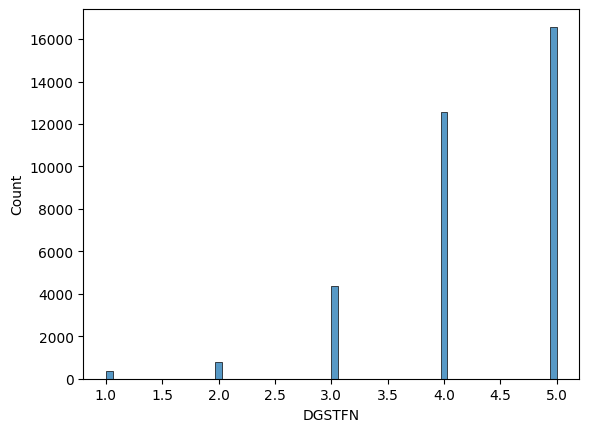

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = a, x = 'DGSTFN')
plt.show()

# 모델 학습

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/모델용데이터/train_v1.csv')
test_df = pd.read_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/모델용데이터/test_v1.csv')
train_df.shape, test_df.shape

((34728, 16), (1825, 16))

- 비율이 안맞으므로 다시 분리

# 데이터 concat 후 재분리

In [ ]:
df = pd.concat([train_df, test_df], axis = 0, ignore_index = True)

1. 데이터 증강 X
    1. TRAVEL_MONTH, 여행스타일들 군집화 안하고
    2. TRAVEL_MONTH, 여행스타일들 군집화하고


2. 데이터 증강 O
    1. TRAVEL_MONTH, 여행스타일들 군집화 안하고
    2. TRAVEL_MONTH, 여행스타일들 군집화하고

- 2번 부결. 다양한 클러스터링 기법으로 시도했으나, 성능 개판(KMeans, DBSCAN, Kmodes)-> 리커트 3으로 하고 유형화로 변경

**최종**

1. 데이터 증강 X
    1. 여행스타일들 유형화 x
    2. 여행스타일들 유형화


2. 데이터 증강 O
    1. 여행스타일들 유형화 x
    2. 여행스타일들 유형화

# 1. 데이터 증강X

In [ ]:
# 전체 데이터의 20%를 테스트 세트로 분리
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify = df['DGSTFN'])

# 남은 80%의 데이터 중 25% (전체의 20%)를 검증 세트로 분리하여 6:2:2 비율을 맞춤
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify = train_val_df['DGSTFN'])

# 각 데이터셋의 크기 확인
print(f"훈련 세트 크기: {len(train_df)}")
print(f"검증 세트 크기: {len(val_df)}")
print(f"테스트 세트 크기: {len(test_df)}")

훈련 세트 크기: 21931
검증 세트 크기: 7311
테스트 세트 크기: 7311


## 1. 여행스타일들 유형화 x


In [ ]:
# 카테코리컬 변수 지정
categorical_features_names = ['GENDER', 'MVMN_NM', 'TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2',
                              'TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2',
                              'NTvsCT',	'EXPLODvsCHPLOD', 'RESTvsACT', 'UNKvsK',
                              'AGE_GRP', 'TRAVEL_MONTH', 'VISIT_AREA_NM']

train_df[categorical_features_names[10:-1]] = train_df[categorical_features_names[10:-1]].astype(int)
val_df[categorical_features_names[10:-1]] = val_df[categorical_features_names[10:-1]].astype(int)
test_df[categorical_features_names[10:-1]] = test_df[categorical_features_names[10:-1]].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 21931 entries, 28505 to 7868
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE_GRP                21931 non-null  int64  
 1   GENDER                 21931 non-null  object 
 2   TRAVEL_MONTH           21931 non-null  int64  
 3   TRAVEL_PERIOD          21931 non-null  int64  
 4   NTvsCT                 21931 non-null  int64  
 5   EXPLODvsCHPLOD         21931 non-null  int64  
 6   RESTvsACT              21931 non-null  int64  
 7   UNKvsK                 21931 non-null  int64  
 8   MVMN_NM                21931 non-null  object 
 9   TRAVEL_MISSION_CHECK1  21931 non-null  object 
 10  TRAVEL_MISSION_CHECK2  21931 non-null  object 
 11  TRAVEL_MOTIVE_1        21931 non-null  object 
 12  TRAVEL_MOTIVE_2        21931 non-null  object 
 13  budget                 21931 non-null  float64
 14  VISIT_AREA_NM          21931 non-null  object 
 15  DGST

In [ ]:
train_pool = Pool(train_df.drop(['DGSTFN'], axis=1),
                  label=train_df['DGSTFN'],
                  cat_features=categorical_features_names)

val_pool = Pool(val_df.drop(['DGSTFN'], axis=1),
                  label=val_df['DGSTFN'],
                  cat_features=categorical_features_names)

test_pool = Pool(test_df.drop(['DGSTFN'], axis=1),
                 label=test_df['DGSTFN'],
                 cat_features=categorical_features_names)

In [ ]:
no_aug_no_type_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='MAE',
    task_type='GPU',
    depth=10,
    learning_rate=0.01,
    n_estimators=10000)

no_aug_no_type_model.fit(
    train_pool,
    eval_set=val_pool,
    verbose=1000,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.6941854	test: 0.6941170	best: 0.6941170 (0)	total: 115ms	remaining: 19m 8s
1000:	learn: 0.6110573	test: 0.6116245	best: 0.6116245 (1000)	total: 1m 26s	remaining: 13m 1s
2000:	learn: 0.5970161	test: 0.6071219	best: 0.6071219 (2000)	total: 2m 56s	remaining: 11m 44s
3000:	learn: 0.5887463	test: 0.6059458	best: 0.6059458 (3000)	total: 4m 23s	remaining: 10m 13s
4000:	learn: 0.5818019	test: 0.6051017	best: 0.6051017 (4000)	total: 5m 46s	remaining: 8m 39s
5000:	learn: 0.5761363	test: 0.6045588	best: 0.6045567 (4995)	total: 7m 11s	remaining: 7m 11s
6000:	learn: 0.5719024	test: 0.6041144	best: 0.6041064 (5995)	total: 8m 35s	remaining: 5m 43s
7000:	learn: 0.5681133	test: 0.6039658	best: 0.6039650 (6900)	total: 10m 1s	remaining: 4m 17s
8000:	learn: 0.5645685	test: 0.6037060	best: 0.6036925 (7990)	total: 11m 27s	remaining: 2m 51s
9000:	learn: 0.5614306	test: 0.6033535	best: 0.6033535 (9000)	total: 12m 55s	remaining: 1m 26s
9999:	learn: 0.5577254	test: 0.6030149	best: 0.6030149 (9999)	t

In [ ]:
test_preds = no_aug_no_type_model.predict(test_pool)

# RMSE 및 MAE 계산
rmse = np.sqrt(mean_squared_error(test_pool.get_label(), test_preds))
mae = mean_absolute_error(test_pool.get_label(), test_preds)

print(f"테스트 RMSE: {rmse}")
print(f"테스트 MAE: {mae}")

테스트 RMSE: 0.7931289242522471
테스트 MAE: 0.5988158542384368


In [ ]:
model_list = []

model_list.append({'model':'no_aug_no_type_model',
                   '테스트 RMSE':rmse,
                   '테스트 MAE':mae})
comparison_df = pd.DataFrame(model_list)
comparison_df

,model,테스트 RMSE,테스트 MAE
0,no_aug_no_type_model,0.793129,0.598816


## 2. 여행스타일들 유형화

In [ ]:
df1 = df.copy()

# 여행스타일 유형화
df1['NTvsCT'] = df1['NTvsCT'].astype(str)
df1['EXPLODvsCHPLOD'] = df1['EXPLODvsCHPLOD'].astype(str)
df1['RESTvsACT'] = df1['RESTvsACT'].astype(str)
df1['UNKvsK'] = df1['UNKvsK'].astype(str)

df1['TRAVEL_STYLE_TYPE'] = df1['NTvsCT'] + df1['EXPLODvsCHPLOD'] + df1['RESTvsACT'] + df1['UNKvsK']
df1.drop(columns = ['NTvsCT', 'EXPLODvsCHPLOD', 'RESTvsACT', 'UNKvsK'], inplace = True)

# TRAVEL_MISSION_CHECK 유형화
df1['TRAVEL_MISSION_CHECK1'] = df1['TRAVEL_MISSION_CHECK1'].astype(str)
df1['TRAVEL_MISSION_CHECK2'] = df1['TRAVEL_MISSION_CHECK2'].astype(str)

df1['TRAVEL_MISSION_TYPE'] = df1['TRAVEL_MISSION_CHECK1'] + df1['TRAVEL_MISSION_CHECK2']
df1.drop(columns = ['TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2'], inplace = True)

# 	TRAVEL_MOTIVE 유형화
df1['TRAVEL_MOTIVE_1'] = df1['TRAVEL_MOTIVE_1'].astype(str)
df1['TRAVEL_MOTIVE_2'] = df1['TRAVEL_MOTIVE_2'].astype(str)

df1['TRAVEL_MOTIVE_TYPE'] = df1['TRAVEL_MOTIVE_2'] + df1['TRAVEL_MOTIVE_2']
df1.drop(columns = ['TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2'], inplace = True)

In [ ]:
# 전체 데이터의 20%를 테스트 세트로 분리
train_val_df, test_df = train_test_split(df1, test_size=0.2, random_state=42, stratify = df1['DGSTFN'])

# 남은 80%의 데이터 중 25% (전체의 20%)를 검증 세트로 분리하여 6:2:2 비율을 맞춤
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify = train_val_df['DGSTFN'])

In [ ]:
# 카테코리컬 변수 지정
categorical_features_names = ['GENDER', 'MVMN_NM', 'TRAVEL_MISSION_TYPE',
                              'TRAVEL_MOTIVE_TYPE','TRAVEL_STYLE_TYPE',
                              'AGE_GRP', 'TRAVEL_MONTH', 'VISIT_AREA_NM']

train_df[categorical_features_names[5:-1]] = train_df[categorical_features_names[5:-1]].astype(int)
val_df[categorical_features_names[5:-1]] = val_df[categorical_features_names[5:-1]].astype(int)
test_df[categorical_features_names[5:-1]] = test_df[categorical_features_names[5:-1]].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 21931 entries, 28505 to 7868
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_GRP              21931 non-null  int64  
 1   GENDER               21931 non-null  object 
 2   TRAVEL_MONTH         21931 non-null  int64  
 3   TRAVEL_PERIOD        21931 non-null  int64  
 4   MVMN_NM              21931 non-null  object 
 5   budget               21931 non-null  float64
 6   VISIT_AREA_NM        21931 non-null  object 
 7   DGSTFN               21931 non-null  float64
 8   TRAVEL_STYLE_TYPE    21931 non-null  object 
 9   TRAVEL_MISSION_TYPE  21931 non-null  object 
 10  TRAVEL_MOTIVE_TYPE   21931 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.0+ MB


In [ ]:
train_pool = Pool(train_df.drop(['DGSTFN'], axis=1),
                  label=train_df['DGSTFN'],
                  cat_features=categorical_features_names)

val_pool = Pool(val_df.drop(['DGSTFN'], axis=1),
                  label=val_df['DGSTFN'],
                  cat_features=categorical_features_names)

test_pool = Pool(test_df.drop(['DGSTFN'], axis=1),
                 label=test_df['DGSTFN'],
                 cat_features=categorical_features_names)


In [ ]:
no_aug_all_type_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='MAE',
    task_type='GPU',
    depth=10,
    learning_rate=0.01,
    n_estimators=10000)

no_aug_all_type_model.fit(
    train_pool,
    eval_set=val_pool,
    verbose=1000,
    plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.6938139	test: 0.6936172	best: 0.6936172 (0)	total: 30.7ms	remaining: 5m 6s
1000:	learn: 0.6067707	test: 0.5968370	best: 0.5968370 (1000)	total: 1m 11s	remaining: 10m 42s
2000:	learn: 0.5967430	test: 0.5951909	best: 0.5951901 (1995)	total: 2m 26s	remaining: 9m 47s
3000:	learn: 0.5895476	test: 0.5949977	best: 0.5949953 (2995)	total: 3m 40s	remaining: 8m 34s
4000:	learn: 0.5842829	test: 0.5947797	best: 0.5947797 (4000)	total: 4m 51s	remaining: 7m 17s
5000:	learn: 0.5804704	test: 0.5948684	best: 0.5947582 (4055)	total: 6m 2s	remaining: 6m 2s
6000:	learn: 0.5769161	test: 0.5949228	best: 0.5947582 (4055)	total: 7m 15s	remaining: 4m 49s
7000:	learn: 0.5745319	test: 0.5950740	best: 0.5947582 (4055)	total: 8m 18s	remaining: 3m 33s
8000:	learn: 0.5718743	test: 0.5950594	best: 0.5947582 (4055)	total: 9m 23s	remaining: 2m 20s
9000:	learn: 0.5690927	test: 0.5950745	best: 0.5947582 (4055)	total: 10m 35s	remaining: 1m 10s
9999:	learn: 0.5663299	test: 0.5951760	best: 0.5947582 (4055)	total

In [ ]:
test_preds = no_aug_all_type_model.predict(test_pool)

# RMSE 및 MAE 계산
rmse = np.sqrt(mean_squared_error(test_pool.get_label(), test_preds))
mae = mean_absolute_error(test_pool.get_label(), test_preds)

print(f"테스트 RMSE: {rmse}")
print(f"테스트 MAE: {mae}")

테스트 RMSE: 0.7878739405524418
테스트 MAE: 0.5882410401255546


In [ ]:
model_list.append({'model':'no_aug_all_type_model',
                   '테스트 RMSE':rmse,
                   '테스트 MAE':mae})
comparison_df = pd.DataFrame(model_list)
comparison_df

,model,테스트 RMSE,테스트 MAE
0,no_aug_no_type_model,0.793129,0.598816
1,no_aug_all_type_model,0.787874,0.588241


# 2. 데이터 증강 O

## 1. 여행스타일들 유형화 x

- 데이터 증강

In [ ]:
# 전체 데이터의 20%를 테스트 세트로 분리
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify = df['DGSTFN'])

# # 남은 80%의 데이터 중 25% (전체의 20%)를 검증 세트로 분리하여 6:2:2 비율을 맞춤
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify = train_val_df['DGSTFN'])

훈련 세트 크기: 21931
검증 세트 크기: 7311
테스트 세트 크기: 7311


In [ ]:
# 카테코리컬 변수 지정
categorical_features_names = ['GENDER', 'MVMN_NM', 'TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2',
                              'TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2',
                              'NTvsCT',	'EXPLODvsCHPLOD', 'RESTvsACT', 'UNKvsK',
                              'AGE_GRP', 'TRAVEL_MONTH', 'VISIT_AREA_NM']

train_df[categorical_features_names[10:-1]] = train_df[categorical_features_names[10:-1]].astype(int)
val_df[categorical_features_names[10:-1]] = val_df[categorical_features_names[10:-1]].astype(int)
test_df[categorical_features_names[10:-1]] = test_df[categorical_features_names[10:-1]].astype(int)


train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21931 entries, 28505 to 7868
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE_GRP                21931 non-null  int64  
 1   GENDER                 21931 non-null  object 
 2   TRAVEL_MONTH           21931 non-null  int64  
 3   TRAVEL_PERIOD          21931 non-null  int64  
 4   NTvsCT                 21931 non-null  int64  
 5   EXPLODvsCHPLOD         21931 non-null  int64  
 6   RESTvsACT              21931 non-null  int64  
 7   UNKvsK                 21931 non-null  int64  
 8   MVMN_NM                21931 non-null  object 
 9   TRAVEL_MISSION_CHECK1  21931 non-null  object 
 10  TRAVEL_MISSION_CHECK2  21931 non-null  object 
 11  TRAVEL_MOTIVE_1        21931 non-null  object 
 12  TRAVEL_MOTIVE_2        21931 non-null  object 
 13  budget                 21931 non-null  float64
 14  VISIT_AREA_NM          21931 non-null  object 
 15  DGST

In [ ]:
from imblearn.over_sampling import SMOTENC

# 범주형 변수 인코딩
for column in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])

# 수치형 변수 모두 int형으로 변경
for column in train_df.select_dtypes(include=['number']).columns:
    train_df[column] = train_df[column].astype(int)

# 데이터셋을 특징과 타겟 변수로 분할
X = train_df.drop('DGSTFN', axis=1)
y = train_df['DGSTFN']

# 카테코리컬 변수 지정
categorical_features_names = ['GENDER', 'MVMN_NM', 'TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2',
                              'TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2',
                              'NTvsCT',	'EXPLODvsCHPLOD', 'RESTvsACT', 'UNKvsK',
                              'AGE_GRP', 'TRAVEL_MONTH', 'VISIT_AREA_NM']

# 학습 데이터에 SMOTENC 적용
smote_nc = SMOTENC(categorical_features=[X.columns.get_loc(col) for col in categorical_features_names], random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# SMOTE 적용 전후 타겟 변수의 분포 출력
original_distribution = Counter(y)
resampled_distribution = Counter(y_resampled)

print("Original target variable distribution:", original_distribution)
print("Resampled target variable distribution:", resampled_distribution)

# 선택적으로 리샘플링된 데이터를 저장
train_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['DGSTFN'])], axis=1)
# resampled_data.to_csv('train_v1_resampled.csv', index=False)

Original target variable distribution: Counter({5: 10488, 4: 7947, 3: 2752, 2: 507, 1: 237})
Resampled target variable distribution: Counter({5: 10488, 4: 10488, 3: 10488, 1: 10488, 2: 10488})


,AGE_GRP,GENDER,TRAVEL_MONTH,TRAVEL_PERIOD,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,MVMN_NM,TRAVEL_MISSION_CHECK1,TRAVEL_MISSION_CHECK2,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,budget,VISIT_AREA_NM,DGSTFN
0,30,1,9,1,1,1,1,2,0,15,16,2,5,28,12523,5
1,20,1,6,2,1,1,1,1,1,9,17,1,5,33,3690,4
2,20,1,8,1,2,2,3,3,1,6,11,4,2,19,7381,5
3,20,1,9,3,3,3,3,3,0,17,4,2,6,35,9253,4
4,40,1,10,3,1,2,3,1,1,0,8,1,2,33,5760,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52435,20,1,8,3,1,3,3,3,0,19,6,5,1,30,7756,4
52436,20,1,11,3,1,1,1,1,1,6,8,2,5,40,1040,4
52437,30,1,10,3,1,1,2,1,1,10,8,5,2,38,6898,4
52438,30,1,10,1,1,3,3,3,0,10,15,6,1,26,6032,4


In [ ]:
train_pool = Pool(train_df.drop(['DGSTFN'], axis=1),
                  label=train_df['DGSTFN'],
                  cat_features=categorical_features_names)

val_pool = Pool(val_df.drop(['DGSTFN'], axis=1),
                  label=val_df['DGSTFN'],
                  cat_features=categorical_features_names)

test_pool = Pool(test_df.drop(['DGSTFN'], axis=1),
                 label=test_df['DGSTFN'],
                 cat_features=categorical_features_names)

In [ ]:
yes_aug_no_type_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='MAE',
    task_type='GPU',
    depth=10,
    learning_rate=0.1,
    n_estimators=500)

yes_aug_no_type_model.fit(
    train_pool,
    eval_set=val_pool,
    verbose=500,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 1.1329920	test: 1.3039189	best: 1.3039189 (0)	total: 41.7ms	remaining: 20.8s
499:	learn: 0.2517022	test: 0.7006894	best: 0.6998701 (175)	total: 16.4s	remaining: 0us
bestTest = 0.6998700588
bestIteration = 175
Shrink model to first 176 iterations.


In [ ]:
test_preds = yes_aug_no_type_model.predict(test_pool)

# RMSE 및 MAE 계산
rmse = np.sqrt(mean_squared_error(test_pool.get_label(), test_preds))
mae = mean_absolute_error(test_pool.get_label(), test_preds)

print(f"테스트 RMSE: {rmse}")
print(f"테스트 MAE: {mae}")

테스트 RMSE: 0.8769909598889001
테스트 MAE: 0.697786402465559


In [ ]:
model_list.append({'model':'yes_aug_no_type_model',
                   '테스트 RMSE':rmse,
                   '테스트 MAE':mae})
comparison_df = pd.DataFrame(model_list)
comparison_df

,model,테스트 RMSE,테스트 MAE
0,no_aug_no_type_model,0.793129,0.598816
1,no_aug_all_type_model,0.787874,0.588241
2,yes_aug_no_type_model,0.876991,0.697786


## 2. 여행스타일들 유형화

In [ ]:
df1 = df.copy()

# 여행스타일 유형화
df1['NTvsCT'] = df1['NTvsCT'].astype(str)
df1['EXPLODvsCHPLOD'] = df1['EXPLODvsCHPLOD'].astype(str)
df1['RESTvsACT'] = df1['RESTvsACT'].astype(str)
df1['UNKvsK'] = df1['UNKvsK'].astype(str)

df1['TRAVEL_STYLE_TYPE'] = df1['NTvsCT'] + df1['EXPLODvsCHPLOD'] + df1['RESTvsACT'] + df1['UNKvsK']
df1.drop(columns = ['NTvsCT', 'EXPLODvsCHPLOD', 'RESTvsACT', 'UNKvsK'], inplace = True)

# TRAVEL_MISSION_CHECK 유형화
df1['TRAVEL_MISSION_CHECK1'] = df1['TRAVEL_MISSION_CHECK1'].astype(str)
df1['TRAVEL_MISSION_CHECK2'] = df1['TRAVEL_MISSION_CHECK2'].astype(str)

df1['TRAVEL_MISSION_TYPE'] = df1['TRAVEL_MISSION_CHECK1'] + df1['TRAVEL_MISSION_CHECK2']
df1.drop(columns = ['TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2'], inplace = True)

# 	TRAVEL_MOTIVE 유형화
df1['TRAVEL_MOTIVE_1'] = df1['TRAVEL_MOTIVE_1'].astype(str)
df1['TRAVEL_MOTIVE_2'] = df1['TRAVEL_MOTIVE_2'].astype(str)

df1['TRAVEL_MOTIVE_TYPE'] = df1['TRAVEL_MOTIVE_2'] + df1['TRAVEL_MOTIVE_2']
df1.drop(columns = ['TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2'], inplace = True)

,AGE_GRP,GENDER,TRAVEL_MONTH,TRAVEL_PERIOD,MVMN_NM,budget,VISIT_AREA_NM,DGSTFN,TRAVEL_STYLE_TYPE,TRAVEL_MISSION_TYPE,TRAVEL_MOTIVE_TYPE
0,60.0,여,10,3,대중교통 등,28.631658,수도국산 달동네박물관,5.0,2122,종교/성지 순례역사 유적지 방문,"역사 탐방, 문화적 경험 등 교육적 동기역사 탐방, 문화적 경험 등 교육적 동기"
1,60.0,여,10,3,대중교통 등,28.631658,인천내리교회,5.0,2122,종교/성지 순례역사 유적지 방문,"역사 탐방, 문화적 경험 등 교육적 동기역사 탐방, 문화적 경험 등 교육적 동기"
2,60.0,여,10,3,대중교통 등,28.631658,부평문화의거리,4.0,2122,종교/성지 순례역사 유적지 방문,"역사 탐방, 문화적 경험 등 교육적 동기역사 탐방, 문화적 경험 등 교육적 동기"
3,60.0,여,10,3,대중교통 등,28.631658,인천배다리헌책방거리,4.0,2122,종교/성지 순례역사 유적지 방문,"역사 탐방, 문화적 경험 등 교육적 동기역사 탐방, 문화적 경험 등 교육적 동기"
4,60.0,여,10,3,대중교통 등,28.631658,인천개항장 근대건축전시관,5.0,2122,종교/성지 순례역사 유적지 방문,"역사 탐방, 문화적 경험 등 교육적 동기역사 탐방, 문화적 경험 등 교육적 동기"
...,...,...,...,...,...,...,...,...,...,...,...
36548,40.0,여,9,1,대중교통 등,89.796751,성산일출봉,5.0,2332,쇼핑역사 유적지 방문,SNS 사진 등록 등 과시SNS 사진 등록 등 과시
36549,40.0,여,9,1,대중교통 등,89.796751,스타벅스 성산 일출봉점,3.0,2332,쇼핑역사 유적지 방문,SNS 사진 등록 등 과시SNS 사진 등록 등 과시
36550,40.0,여,9,1,대중교통 등,89.796751,런던 베이글 뮤지엄 제주점,4.0,2332,쇼핑역사 유적지 방문,SNS 사진 등록 등 과시SNS 사진 등록 등 과시
36551,40.0,여,9,1,대중교통 등,89.796751,스타벅스 제주 함덕점,3.0,2332,쇼핑역사 유적지 방문,SNS 사진 등록 등 과시SNS 사진 등록 등 과시


In [ ]:
# 전체 데이터의 20%를 테스트 세트로 분리
train_val_df, test_df = train_test_split(df1, test_size=0.2, random_state=42, stratify = df1['DGSTFN'])

# # 남은 80%의 데이터 중 25% (전체의 20%)를 검증 세트로 분리하여 6:2:2 비율을 맞춤
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify = train_val_df['DGSTFN'])

훈련 세트 크기: 21931
검증 세트 크기: 7311
테스트 세트 크기: 7311


In [ ]:
# 카테코리컬 변수 지정
categorical_features_names = ['GENDER', 'MVMN_NM', 'TRAVEL_MISSION_TYPE',
                              'TRAVEL_MOTIVE_TYPE','TRAVEL_STYLE_TYPE',
                              'AGE_GRP', 'TRAVEL_MONTH', 'VISIT_AREA_NM']

train_df[categorical_features_names[5:-1]] = train_df[categorical_features_names[5:-1]].astype(int)
val_df[categorical_features_names[5:-1]] = val_df[categorical_features_names[5:-1]].astype(int)
test_df[categorical_features_names[5:-1]] = test_df[categorical_features_names[5:-1]].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 21931 entries, 28505 to 7868
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_GRP              21931 non-null  int64  
 1   GENDER               21931 non-null  object 
 2   TRAVEL_MONTH         21931 non-null  int64  
 3   TRAVEL_PERIOD        21931 non-null  int64  
 4   MVMN_NM              21931 non-null  object 
 5   budget               21931 non-null  float64
 6   VISIT_AREA_NM        21931 non-null  object 
 7   DGSTFN               21931 non-null  float64
 8   TRAVEL_STYLE_TYPE    21931 non-null  object 
 9   TRAVEL_MISSION_TYPE  21931 non-null  object 
 10  TRAVEL_MOTIVE_TYPE   21931 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.0+ MB


In [ ]:
from imblearn.over_sampling import SMOTENC

# 범주형 변수 인코딩
for column in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])

# 수치형 변수 모두 int형으로 변경
for column in train_df.select_dtypes(include=['number']).columns:
    train_df[column] = train_df[column].astype(int)

# 데이터셋을 특징과 타겟 변수로 분할
X = train_df.drop('DGSTFN', axis=1)
y = train_df['DGSTFN']

# 카테코리컬 변수 지정
categorical_features_names = ['GENDER', 'MVMN_NM', 'TRAVEL_MISSION_TYPE',
                              'TRAVEL_MOTIVE_TYPE','TRAVEL_STYLE_TYPE',
                              'AGE_GRP', 'TRAVEL_MONTH', 'VISIT_AREA_NM']

# 학습 데이터에 SMOTENC 적용
smote_nc = SMOTENC(categorical_features=[X.columns.get_loc(col) for col in categorical_features_names], random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# SMOTE 적용 전후 타겟 변수의 분포 출력
original_distribution = Counter(y)
resampled_distribution = Counter(y_resampled)

print("Original target variable distribution:", original_distribution)
print("Resampled target variable distribution:", resampled_distribution)

# 선택적으로 리샘플링된 데이터를 저장
train_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['DGSTFN'])], axis=1)
# resampled_data.to_csv('train_v1_resampled.csv', index=False)

Original target variable distribution: Counter({5: 10488, 4: 7947, 3: 2752, 2: 507, 1: 237})
Resampled target variable distribution: Counter({5: 10488, 4: 10488, 3: 10488, 1: 10488, 2: 10488})


,AGE_GRP,GENDER,TRAVEL_MONTH,TRAVEL_PERIOD,MVMN_NM,budget,VISIT_AREA_NM,TRAVEL_STYLE_TYPE,TRAVEL_MISSION_TYPE,TRAVEL_MOTIVE_TYPE,DGSTFN
0,30,1,9,1,0,28,12523,1,276,5,5
1,20,1,6,2,1,33,3690,0,176,5,4
2,20,1,8,1,1,19,7381,44,114,2,5
3,20,1,9,3,0,35,9253,80,301,6,4
4,40,1,10,3,1,33,5760,15,7,2,5
...,...,...,...,...,...,...,...,...,...,...,...
52435,20,1,8,3,0,30,9663,26,338,1,4
52436,20,1,11,3,1,40,5568,0,111,5,4
52437,30,1,10,3,1,38,13543,3,188,2,4
52438,30,1,10,1,0,26,8741,26,194,1,4


In [ ]:
train_pool = Pool(train_df.drop(['DGSTFN'], axis=1),
                  label=train_df['DGSTFN'],
                  cat_features=categorical_features_names)

val_pool = Pool(val_df.drop(['DGSTFN'], axis=1),
                  label=val_df['DGSTFN'],
                  cat_features=categorical_features_names)

test_pool = Pool(test_df.drop(['DGSTFN'], axis=1),
                 label=test_df['DGSTFN'],
                 cat_features=categorical_features_names)

In [ ]:
yes_aug_yes_type_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='MAE',
    task_type='GPU',
    depth=10,
    learning_rate=0.01,
    n_estimators=10000)

yes_aug_yes_type_model.fit(
    train_pool,
    eval_set=val_pool,
    verbose=1000,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 1.1936135	test: 1.3569007	best: 1.3569007 (0)	total: 34.3ms	remaining: 5m 43s
1000:	learn: 0.3617577	test: 0.6908113	best: 0.6886038 (455)	total: 27.9s	remaining: 4m 10s
2000:	learn: 0.3076811	test: 0.6945981	best: 0.6886038 (455)	total: 57s	remaining: 3m 47s
3000:	learn: 0.2772666	test: 0.6952091	best: 0.6886038 (455)	total: 1m 27s	remaining: 3m 23s
4000:	learn: 0.2552814	test: 0.6957411	best: 0.6886038 (455)	total: 1m 57s	remaining: 2m 56s
5000:	learn: 0.2383473	test: 0.6952726	best: 0.6886038 (455)	total: 2m 29s	remaining: 2m 29s
6000:	learn: 0.2248404	test: 0.6950106	best: 0.6886038 (455)	total: 3m	remaining: 2m
7000:	learn: 0.2133067	test: 0.6950634	best: 0.6886038 (455)	total: 3m 33s	remaining: 1m 31s
8000:	learn: 0.2031115	test: 0.6952152	best: 0.6886038 (455)	total: 4m 7s	remaining: 1m 1s
9000:	learn: 0.1939902	test: 0.6951843	best: 0.6886038 (455)	total: 4m 41s	remaining: 31.2s
9999:	learn: 0.1858978	test: 0.6954613	best: 0.6886038 (455)	total: 5m 15s	remaining: 0us


In [ ]:
test_preds = yes_aug_yes_type_model.predict(test_pool)

# RMSE 및 MAE 계산
rmse = np.sqrt(mean_squared_error(test_pool.get_label(), test_preds))
mae = mean_absolute_error(test_pool.get_label(), test_preds)

print(f"테스트 RMSE: {rmse}")
print(f"테스트 MAE: {mae}")

테스트 RMSE: 0.862458311671291
테스트 MAE: 0.6893627896364011


In [ ]:
model_list.append({'model':'yes_aug_yes_type_model',
                   '테스트 RMSE':rmse,
                   '테스트 MAE':mae})
comparison_df = pd.DataFrame(model_list)

In [ ]:
# '테스트 MAE'와 '테스트 RMSE' 기준으로 오름차순 정렬
comparison_df = comparison_df.sort_values(by=['테스트 MAE', '테스트 RMSE'])
comparison_df.drop_duplicates()

,model,테스트 RMSE,테스트 MAE
1,no_aug_all_type_model,0.787874,0.588241
0,no_aug_no_type_model,0.793129,0.598816
3,yes_aug_yes_type_model,0.862458,0.689363
2,yes_aug_no_type_model,0.876991,0.697786


# 최종 모델로 하이퍼파라미터 튜닝

- no_aug_yes_type_model로 결정

## 기본 모델

In [ ]:
df1 = df.copy()

# 여행스타일 유형화
df1['NTvsCT'] = df1['NTvsCT'].astype(str)
df1['EXPLODvsCHPLOD'] = df1['EXPLODvsCHPLOD'].astype(str)
df1['RESTvsACT'] = df1['RESTvsACT'].astype(str)
df1['UNKvsK'] = df1['UNKvsK'].astype(str)

df1['TRAVEL_STYLE_TYPE'] = df1['NTvsCT'] + df1['EXPLODvsCHPLOD'] + df1['RESTvsACT'] + df1['UNKvsK']
df1.drop(columns = ['NTvsCT', 'EXPLODvsCHPLOD', 'RESTvsACT', 'UNKvsK'], inplace = True)

# TRAVEL_MISSION_CHECK 유형화
df1['TRAVEL_MISSION_CHECK1'] = df1['TRAVEL_MISSION_CHECK1'].astype(str)
df1['TRAVEL_MISSION_CHECK2'] = df1['TRAVEL_MISSION_CHECK2'].astype(str)

df1['TRAVEL_MISSION_TYPE'] = df1['TRAVEL_MISSION_CHECK1'] + df1['TRAVEL_MISSION_CHECK2']
df1.drop(columns = ['TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2'], inplace = True)

# 	TRAVEL_MOTIVE 유형화
df1['TRAVEL_MOTIVE_1'] = df1['TRAVEL_MOTIVE_1'].astype(str)
df1['TRAVEL_MOTIVE_2'] = df1['TRAVEL_MOTIVE_2'].astype(str)

df1['TRAVEL_MOTIVE_TYPE'] = df1['TRAVEL_MOTIVE_2'] + df1['TRAVEL_MOTIVE_2']
df1.drop(columns = ['TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2'], inplace = True)

# 전체 데이터의 20%를 테스트 세트로 분리
train_val_df, test_df = train_test_split(df1, test_size=0.2, random_state=42, stratify = df1['DGSTFN'])

# 남은 80%의 데이터 중 25% (전체의 20%)를 검증 세트로 분리하여 6:2:2 비율을 맞춤
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify = train_val_df['DGSTFN'])

# 각 데이터셋의 크기 확인
print(f"훈련 세트 크기: {len(train_df)}")
print(f"검증 세트 크기: {len(val_df)}")
print(f"테스트 세트 크기: {len(test_df)}")

# 카테코리컬 변수 지정
categorical_features_names = ['GENDER', 'MVMN_NM', 'TRAVEL_MISSION_TYPE',
                              'TRAVEL_MOTIVE_TYPE','TRAVEL_STYLE_TYPE',
                              'AGE_GRP', 'TRAVEL_MONTH', 'VISIT_AREA_NM']

train_df[categorical_features_names[5:-1]] = train_df[categorical_features_names[5:-1]].astype(int)
val_df[categorical_features_names[5:-1]] = val_df[categorical_features_names[5:-1]].astype(int)
test_df[categorical_features_names[5:-1]] = test_df[categorical_features_names[5:-1]].astype(int)
train_df.info()


train_pool = Pool(train_df.drop(['DGSTFN'], axis=1),
                  label=train_df['DGSTFN'],
                  cat_features=categorical_features_names)

val_pool = Pool(val_df.drop(['DGSTFN'], axis=1),
                  label=val_df['DGSTFN'],
                  cat_features=categorical_features_names)

test_pool = Pool(test_df.drop(['DGSTFN'], axis=1),
                 label=test_df['DGSTFN'],
                 cat_features=categorical_features_names)

no_aug_yes_type_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='MAE',
    task_type='GPU',
    depth=10,
    learning_rate=0.01,
    n_estimators=10000)

no_aug_yes_type_model.fit(
    train_pool,
    eval_set=val_pool,
    verbose=1000,
    plot=True)

test_preds = no_aug_yes_type_model.predict(test_pool)

# RMSE 및 MAE 계산
rmse = np.sqrt(mean_squared_error(test_pool.get_label(), test_preds))
mae = mean_absolute_error(test_pool.get_label(), test_preds)

print(f"테스트 RMSE: {rmse}")
print(f"테스트 MAE: {mae}")

훈련 세트 크기: 21931
검증 세트 크기: 7311
테스트 세트 크기: 7311
<class 'pandas.core.frame.DataFrame'>
Index: 21931 entries, 28505 to 7868
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_GRP              21931 non-null  int64  
 1   GENDER               21931 non-null  object 
 2   TRAVEL_MONTH         21931 non-null  int64  
 3   TRAVEL_PERIOD        21931 non-null  int64  
 4   MVMN_NM              21931 non-null  object 
 5   budget               21931 non-null  float64
 6   VISIT_AREA_NM        21931 non-null  object 
 7   DGSTFN               21931 non-null  float64
 8   TRAVEL_STYLE_TYPE    21931 non-null  object 
 9   TRAVEL_MISSION_TYPE  21931 non-null  object 
 10  TRAVEL_MOTIVE_TYPE   21931 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.0+ MB


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.6894147	test: 0.6882029	best: 0.6882029 (0)	total: 36ms	remaining: 5m 59s
1000:	learn: 0.5672148	test: 0.5960763	best: 0.5949993 (490)	total: 1m 12s	remaining: 10m 54s
2000:	learn: 0.5466323	test: 0.5968523	best: 0.5949993 (490)	total: 2m 27s	remaining: 9m 49s
3000:	learn: 0.5292013	test: 0.5970244	best: 0.5949993 (490)	total: 3m 43s	remaining: 8m 41s
4000:	learn: 0.5198848	test: 0.5981739	best: 0.5949993 (490)	total: 4m 59s	remaining: 7m 29s
5000:	learn: 0.5103479	test: 0.5983426	best: 0.5949993 (490)	total: 6m 14s	remaining: 6m 14s
6000:	learn: 0.5016667	test: 0.5990267	best: 0.5949993 (490)	total: 7m 30s	remaining: 5m
7000:	learn: 0.4950629	test: 0.5996340	best: 0.5949993 (490)	total: 8m 48s	remaining: 3m 46s
8000:	learn: 0.4871824	test: 0.6000434	best: 0.5949993 (490)	total: 10m 6s	remaining: 2m 31s
9000:	learn: 0.4796019	test: 0.6007494	best: 0.5949993 (490)	total: 11m 25s	remaining: 1m 16s
9999:	learn: 0.4729020	test: 0.6012109	best: 0.5949993 (490)	total: 12m 46s	rem

## 베이즈 서치를 통한 파라미터 튜닝

In [ ]:
# 베이지안 최적화를 위한 함수 정의
def catboost_evaluate(depth, learning_rate, l2_leaf_reg, bagging_temperature, border_count):
    # 정수형 파라미터 변환
    depth = int(depth)
    border_count = int(border_count)

    # 모델 정의
    model = CatBoostRegressor(
        loss_function='RMSE',
        eval_metric='RMSE',
        task_type='GPU',
        devices='0:1',
        depth=depth,
        learning_rate=learning_rate,  # 단일 학습률 값을 사용
        l2_leaf_reg=l2_leaf_reg,
        bagging_temperature=bagging_temperature,
        border_count=border_count,
        n_estimators=300,
        verbose=50
    )

    # 모델 학습
    model.fit(train_pool, eval_set=val_pool, verbose=1)

    # 검증 세트에 대한 예측 및 MAE 계산
    val_preds = model.predict(val_pool)
    mae = mean_absolute_error(val_pool.get_label(), val_preds)

    # 베이지안 최적화는 목표를 최대화하므로 MAE의 음수 값을 반환
    return -mae


df1 = df.copy()

# 여행스타일 유형화
df1['NTvsCT'] = df1['NTvsCT'].astype(str)
df1['EXPLODvsCHPLOD'] = df1['EXPLODvsCHPLOD'].astype(str)
df1['RESTvsACT'] = df1['RESTvsACT'].astype(str)
df1['UNKvsK'] = df1['UNKvsK'].astype(str)

df1['TRAVEL_STYLE_TYPE'] = df1['NTvsCT'] + df1['EXPLODvsCHPLOD'] + df1['RESTvsACT'] + df1['UNKvsK']
df1.drop(columns = ['NTvsCT', 'EXPLODvsCHPLOD', 'RESTvsACT', 'UNKvsK'], inplace = True)

# TRAVEL_MISSION_CHECK 유형화
df1['TRAVEL_MISSION_CHECK1'] = df1['TRAVEL_MISSION_CHECK1'].astype(str)
df1['TRAVEL_MISSION_CHECK2'] = df1['TRAVEL_MISSION_CHECK2'].astype(str)

df1['TRAVEL_MISSION_TYPE'] = df1['TRAVEL_MISSION_CHECK1'] + df1['TRAVEL_MISSION_CHECK2']
df1.drop(columns = ['TRAVEL_MISSION_CHECK1', 'TRAVEL_MISSION_CHECK2'], inplace = True)

# 	TRAVEL_MOTIVE 유형화
df1['TRAVEL_MOTIVE_1'] = df1['TRAVEL_MOTIVE_1'].astype(str)
df1['TRAVEL_MOTIVE_2'] = df1['TRAVEL_MOTIVE_2'].astype(str)

df1['TRAVEL_MOTIVE_TYPE'] = df1['TRAVEL_MOTIVE_2'] + df1['TRAVEL_MOTIVE_2']
df1.drop(columns = ['TRAVEL_MOTIVE_1', 'TRAVEL_MOTIVE_2'], inplace = True)

# 전체 데이터의 20%를 테스트 세트로 분리
train_val_df, test_df = train_test_split(df1, test_size=0.2, random_state=42, stratify = df1['DGSTFN'])

# 남은 80%의 데이터 중 25% (전체의 20%)를 검증 세트로 분리하여 6:2:2 비율을 맞춤
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify = train_val_df['DGSTFN'])


# 카테코리컬 변수 지정
categorical_features_names = ['GENDER', 'MVMN_NM', 'TRAVEL_MISSION_TYPE',
                              'TRAVEL_MOTIVE_TYPE','TRAVEL_STYLE_TYPE',
                              'AGE_GRP', 'TRAVEL_MONTH', 'VISIT_AREA_NM']

train_df[categorical_features_names[5:-1]] = train_df[categorical_features_names[5:-1]].astype(int)
val_df[categorical_features_names[5:-1]] = val_df[categorical_features_names[5:-1]].astype(int)
test_df[categorical_features_names[5:-1]] = test_df[categorical_features_names[5:-1]].astype(int)



train_pool = Pool(train_df.drop(['DGSTFN'], axis=1),
                  label=train_df['DGSTFN'],
                  cat_features=categorical_features_names)

val_pool = Pool(val_df.drop(['DGSTFN'], axis=1),
                  label=val_df['DGSTFN'],
                  cat_features=categorical_features_names)
test_pool = Pool(test_df.drop(['DGSTFN'], axis=1),
                 label=test_df['DGSTFN'],
                 cat_features=categorical_features_names)


# 베이지안 최적화를 위한 파라미터 범위 설정
pbounds = {
    'depth': (4, 16),
    'learning_rate': (0.001, 0.1),
    'l2_leaf_reg': (1, 20),
    'bagging_temperature': (0, 2),
    'border_count': (16, 300)
}

# Bayesian Optimization 객체 생성
optimizer = BayesianOptimization(
    f=catboost_evaluate,
    pbounds=pbounds,
    random_state=42,
    verbose=1
)

# 최적화 수행
optimizer.maximize(init_points=5, n_iter=25)

# 최적 파라미터 출력
print("Best Parameters:")
print(optimizer.max)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
145:	learn: 0.5977690	test: 0.8018855	best: 0.8018459 (143)	total: 44.3s	remaining: 46.7s
146:	learn: 0.5965972	test: 0.8019175	best: 0.8018459 (143)	total: 44.6s	remaining: 46.4s
147:	learn: 0.5957655	test: 0.8019975	best: 0.8018459 (143)	total: 44.9s	remaining: 46.1s
148:	learn: 0.5948143	test: 0.8020022	best: 0.8018459 (143)	total: 45.2s	remaining: 45.8s
149:	learn: 0.5936712	test: 0.8020748	best: 0.8018459 (143)	total: 45.5s	remaining: 45.5s
150:	learn: 0.5927410	test: 0.8021799	best: 0.8018459 (143)	total: 45.8s	remaining: 45.2s
151:	learn: 0.5917761	test: 0.8022494	best: 0.8018459 (143)	total: 46.1s	remaining: 44.9s
152:	learn: 0.5903620	test: 0.8023127	best: 0.8018459 (143)	total: 46.4s	remaining: 44.6s
153:	learn: 0.5893446	test: 0.8023430	best: 0.8018459 (143)	total: 46.7s	remaining: 44.3s
154:	learn: 0.5886258	test: 0.8024090	best: 0.8018459 (143)	total: 47s	remaining: 44s
155:	learn: 0.5878811	test: 0.8023627	best: 0.8018459 (143)	total: 4

In [ ]:
# SMAPE 계산 함수
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-8))

# 최적 파라미터로 최종 모델 학습
best_params = optimizer.max['params']

final_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    task_type='GPU',
    depth=int(best_params['depth']),
    learning_rate=best_params['learning_rate'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    bagging_temperature=best_params['bagging_temperature'],
    border_count=int(best_params['border_count']),
    n_estimators=10000,
    early_stopping_rounds=1000
)

# 최종 모델 학습
final_model.fit(train_pool, eval_set=val_pool, verbose=100, plot=True)

# 테스트 세트에 대한 예측
test_preds = final_model.predict(test_pool)

# RMSE, MAE, SMAPE, R² 계산
rmse = np.sqrt(mean_squared_error(test_pool.get_label(), test_preds))
mae = mean_absolute_error(test_pool.get_label(), test_preds)
smape_value = smape(test_pool.get_label(), test_preds)
r2 = r2_score(test_pool.get_label(), test_preds)

# 결과 출력
print(f"테스트 RMSE: {rmse}")
print(f"테스트 MAE: {mae}")
print(f"테스트 SMAPE: {smape_value}")
print(f"테스트 R²: {r2}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8449197	test: 0.8441397	best: 0.8441397 (0)	total: 23.1ms	remaining: 3m 51s
100:	learn: 0.8073081	test: 0.7931189	best: 0.7931189 (100)	total: 2.05s	remaining: 3m 21s
200:	learn: 0.8031664	test: 0.7912307	best: 0.7912204 (195)	total: 4.05s	remaining: 3m 17s
300:	learn: 0.7997880	test: 0.7904208	best: 0.7904208 (300)	total: 5.99s	remaining: 3m 13s
400:	learn: 0.7974463	test: 0.7901506	best: 0.7901506 (400)	total: 7.84s	remaining: 3m 7s
500:	learn: 0.7955887	test: 0.7899508	best: 0.7899340 (490)	total: 9.68s	remaining: 3m 3s
600:	learn: 0.7943904	test: 0.7896984	best: 0.7896984 (599)	total: 11.5s	remaining: 2m 59s
700:	learn: 0.7925079	test: 0.7896129	best: 0.7895732 (635)	total: 13.4s	remaining: 2m 57s
800:	learn: 0.7911892	test: 0.7896047	best: 0.7895469 (716)	total: 15.3s	remaining: 2m 55s
900:	learn: 0.7893443	test: 0.7895891	best: 0.7894754 (861)	total: 17.2s	remaining: 2m 53s
1000:	learn: 0.7874821	test: 0.7894733	best: 0.7894281 (996)	total: 19.1s	remaining: 2m 51s
110

               Feature  Importance
8  TRAVEL_MISSION_TYPE   24.361298
7    TRAVEL_STYLE_TYPE   19.961206
6        VISIT_AREA_NM   14.510375
9   TRAVEL_MOTIVE_TYPE   10.718920
0              AGE_GRP    9.467320
5               budget    7.593124
2         TRAVEL_MONTH    7.318812
3        TRAVEL_PERIOD    5.504850
4              MVMN_NM    0.404173
1               GENDER    0.159921


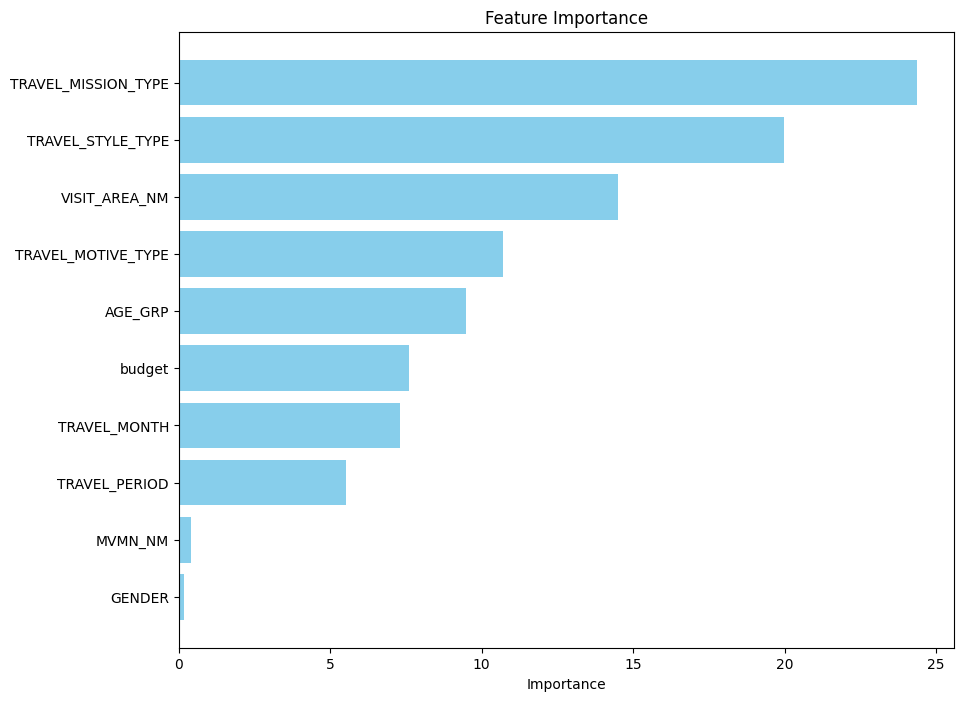

In [ ]:
# Assuming you have trained a CatBoost model named `model`

# Get feature importance
feature_importances = final_model.get_feature_importance(train_pool)
feature_names = train_pool.get_feature_names()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

In [ ]:
model = CatBoostRegressor()
model = model.load_model("/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/final_catboost_model.cbm")
model.save_model('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/final_catboost_model.bin')